https://coronavirus.data.gov.uk/cases

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import date
from matplotlib.pyplot import cm


## New cases 

(737669.0, 737760.0)

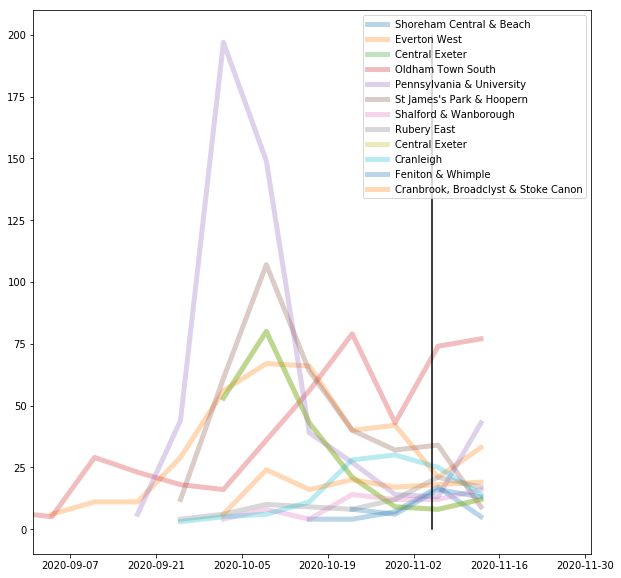

In [38]:
df = pd.read_csv('https://coronavirus.data.gov.uk/downloads/msoa_data/MSOAs_latest.csv')
df = df.replace(-99, np.nan)

# areas = ['Waverley','Exeter','Adur','East Devon','Plymouth','Guildford']

local_areas = ['Shoreham Central & Beach','Everton West','Central Exeter','Oldham Town South','Pennsylvania & University',"St James's Park & Hoopern",'Shalford & Wanborough','Rubery East','Central Exeter','Cranleigh','Feniton & Whimple','Cranbrook, Broadclyst & Stoke Canon']
# df_tmp = df.loc[df['msoa11_hclnm'] == 'Pennsylvania & University']
# df_tmp.iloc[0,8:-1]
# # df_tmp.loc[0,8:10]

plt.figure(figsize=(10, 10))

# for area in areas:
#     df_tmp = df.loc[df['lad19_nm'] == area]
#     df_area = df_tmp.iloc[:,8:-1].sum(axis=0)
#     dates = [datetime.datetime.strptime("2020"+d + '-1', "%Ywk_%W-%w") for d in df_area.index]
#     plt.plot(dates,df_area,lw=5.0,alpha=0.3,label = area)
    
# for local_area in local_areas:
#     df_tmp = df.loc[df['msoa11_hclnm'] == local_area]
#     df_area = df_tmp.iloc[:,8:-1].sum(axis=0)
#     dates = [datetime.datetime.strptime("2020"+d + '-1', "%Ywk_%W-%w") for d in df_area.index]
#     plt.plot(dates,df_area,label = local_area)

for area in local_areas:
    df_tmp = df.loc[df['areaName'] == area]
#     df_area = df_tmp.iloc[:,8:-1].sum(axis=0)
    df_area = df_tmp['newCasesBySpecimenDateRollingSum']
#     dates = [datetime.datetime.strptime("2020"+d + '-1', "%Ywk_%W-%w") for d in df['date']]
    dates =  df_tmp['date']
    plt.plot(pd.to_datetime(dates),df_area.values,lw=5.0,alpha=0.3,label = area)

plt.plot([datetime.datetime(2020, 11, 5, 0, 0),datetime.datetime(2020, 11, 5, 0, 0)],[0,200],'k')
    
plt.legend()
plt.xlim([datetime.datetime(2020, 9, 1, 0, 0),datetime.datetime(2020, 12, 1, 0, 0)])



In [32]:
search_for = 'Exeter'
print(df['areaName'][df['areaName'].str.contains(search_for)].unique())

['Central Exeter']


## Hospital admissions


https://www.england.nhs.uk/statistics/statistical-work-areas/covid-19-hospital-activity/

In [3]:
# df2 = pd.read_excel('https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/10/Weekly-covid-admissions-publication-201015-1.xlsx',sheet_name='Hosp ads & diag',header=14)


today = date.today()
day = today.day
month = today.month
month_tmp = month
# day_tmp = day
day_tmp = 31

date_found = False
#loops just to get the most recent filename that exists
for i in range(10):
    for j in range(32):
        
        filename = 'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/'+str(month_tmp)+'/Weekly-covid-admissions-and-beds-publication-20'+str(month_tmp)+str(day_tmp)+'.xlsx'
#                    'https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/10/Weekly-covid-admissions-publication-201022.xlsx'
                    #https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/10/Weekly-covid-admissions-publication-201029-2.xlsx
                    #https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/11/Covid-Publication-12-11-2020_v4-CB.xlsx
                    #https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/11/Weekly-covid-admissions-and-beds-publication-201112-1.xlsx
        try:
            df2 = pd.read_excel(filename,sheet_name='Hosp ads & diag',header=14)
            date_found = True
            print filename
            break
        except:
            pass
        day_tmp -= 1
    if date_found:
        break
    month_tmp -= 1
    day_tmp = 31
    # df2 = pd.read_excel('https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/10/Weekly-covid-admissions-publication-201015-1.xlsx',sheet_name='Hosp ads & diag',header=14)
    

https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2020/11/Weekly-covid-admissions-and-beds-publication-201112.xlsx


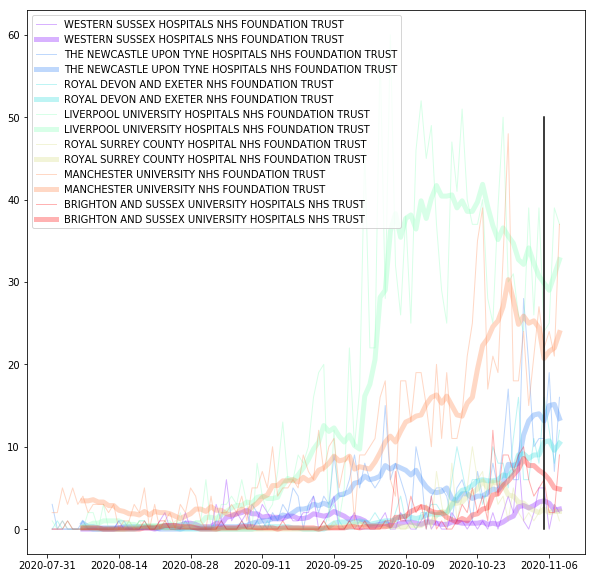

In [93]:
hospitals = ['WESTERN SUSSEX HOSPITALS NHS FOUNDATION TRUST','THE NEWCASTLE UPON TYNE HOSPITALS NHS FOUNDATION TRUST','ROYAL DEVON AND EXETER NHS FOUNDATION TRUST','LIVERPOOL UNIVERSITY HOSPITALS NHS FOUNDATION TRUST','ROYAL SURREY COUNTY HOSPITAL NHS FOUNDATION TRUST','MANCHESTER UNIVERSITY NHS FOUNDATION TRUST','BRIGHTON AND SUSSEX UNIVERSITY HOSPITALS NHS TRUST']

color=iter(cm.rainbow(np.linspace(0,1,len(hospitals))))

plt.figure(figsize=(10, 10))

for hospital in hospitals:
    df_tmp = df2.loc[df2['Name'] == hospital]
    df_hospital = df_tmp.iloc[:,4::]
    c=next(color)
    plt.plot(df_hospital.transpose(),c=c,lw=1.0,alpha=0.3,label = hospital)
    plt.plot(df_hospital.transpose().rolling(7).mean(),c=c,lw=5.0,alpha=0.3,label = hospital)
    

plt.plot([datetime.datetime(2020, 11, 5, 0, 0),datetime.datetime(2020, 11, 5, 0, 0)],[0,50],'k')
    

plt.legend()

## No. beds containing confirmed COVID patients

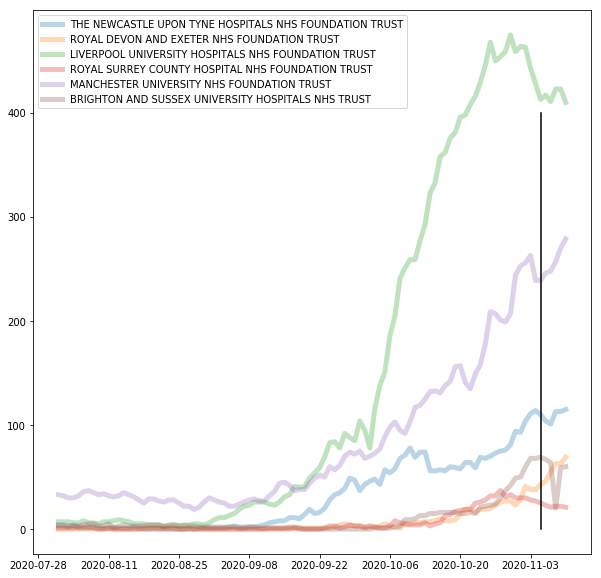

In [41]:

df3 = pd.read_excel(filename,sheet_name='All beds COVID',header=14)

plt.figure(figsize=(10, 10))

for hospital in hospitals:
    df_tmp = df3.loc[df3['Name'] == hospital]
    df_hospital = df_tmp.iloc[:,4::]
    plt.plot(df_hospital.transpose(),lw=5.0,alpha=0.3,label = hospital)


plt.plot([datetime.datetime(2020, 11, 5, 0, 0),datetime.datetime(2020, 11, 5, 0, 0)],[0,400],'k')

plt.legend()

## No. ventilator beds containing confirmed COVID patients

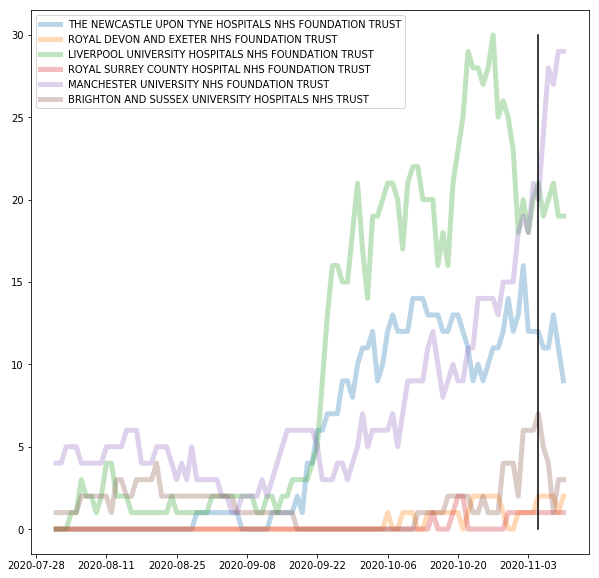

In [43]:

df4 = pd.read_excel(filename,sheet_name='MV beds COVID',header=14)

plt.figure(figsize=(10, 10))

for hospital in hospitals:
    df_tmp = df4.loc[df4['Name'] == hospital]
    df_hospital = df_tmp.iloc[:,4::]
    plt.plot(df_hospital.transpose(),lw=5.0,alpha=0.3,label = hospital)

plt.plot([datetime.datetime(2020, 11, 5, 0, 0),datetime.datetime(2020, 11, 5, 0, 0)],[0,30],'k')
    
plt.legend()

In [76]:

search_for = 'SUSSEX'
df4['Name'].dropna()[df4['Name'].dropna().str.contains(search_for)]

386                                SPIRE SUSSEX HOSPITAL
418                SUSSEX COMMUNITY NHS FOUNDATION TRUST
430               SURREY AND SUSSEX HEALTHCARE NHS TRUST
435              SUSSEX PARTNERSHIP NHS FOUNDATION TRUST
436                     EAST SUSSEX HEALTHCARE NHS TRUST
437    BRIGHTON AND SUSSEX UNIVERSITY HOSPITALS NHS T...
441        WESTERN SUSSEX HOSPITALS NHS FOUNDATION TRUST
Name: Name, dtype: object

In [83]:
df4

,Type 1 Acute?,NHS England Region,Code,Name,2020-08-01 00:00:00,2020-08-02 00:00:00,2020-08-03 00:00:00,2020-08-04 00:00:00,2020-08-05 00:00:00,2020-08-06 00:00:00,...,2020-11-01 00:00:00,2020-11-02 00:00:00,2020-11-03 00:00:00,2020-11-04 00:00:00,2020-11-05 00:00:00,2020-11-06 00:00:00,2020-11-07 00:00:00,2020-11-08 00:00:00,2020-11-09 00:00:00,2020-11-10 00:00:00
0,NaN,NaN,-,ENGLAND,74.0,72.0,67.0,65.0,63.0,61.0,...,804.0,883.0,954.0,997.0,986.0,984.0,1003.0,1017.0,1048.0,1010.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,East of England,9.0,9.0,8.0,8.0,8.0,9.0,...,50.0,54.0,63.0,65.0,60.0,61.0,62.0,64.0,68.0,72.0
3,NaN,NaN,NaN,London,16.0,15.0,17.0,15.0,13.0,11.0,...,136.0,142.0,147.0,151.0,154.0,155.0,156.0,167.0,179.0,179.0
4,NaN,NaN,NaN,Midlands,13.0,10.0,10.0,13.0,13.0,14.0,...,191.0,197.0,225.0,223.0,227.0,223.0,233.0,231.0,229.0,223.0
5,NaN,NaN,NaN,North East and Yorkshire,9.0,8.0,7.0,7.0,7.0,6.0,...,140.0,167.0,183.0,194.0,197.0,184.0,195.0,197.0,204.0,198.0
6,NaN,NaN,NaN,North West,15.0,15.0,13.0,13.0,13.0,13.0,...,209.0,231.0,238.0,257.0,233.0,256.0,262.0,251.0,259.0,229.0
7,NaN,NaN,NaN,South East,12.0,15.0,12.0,9.0,9.0,8.0,...,36.0,42.0,41.0,47.0,48.0,45.0,44.0,50.0,53.0,52.0
8,NaN,NaN,NaN,South West,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,50.0,57.0,60.0,67.0,60.0,51.0,57.0,56.0,57.0
9,No,East of England,AND01,BADDOW HOSPITAL,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
